In [1]:
import requests
from bs4 import BeautifulSoup
import time

url = 'https://www.jalan.net/yad337214/kuchikomi/?screenId=UWW3001&yadNo=337214&dateUndecided=1&adultNum=2&roomCount=1&smlCd=073208&distCd=01&ccnt=lean-kuchikomi-tab'
response = requests.get(url)
time.sleep(2)
response.encoding = response.apparent_encoding

soup = BeautifulSoup(response.text, 'html.parser')

url_list = ["https://www.jalan.net/yad337214/kuchikomi/2.HTML?maxPrice=999999&roomCrack=200000&screenId=UWW3701&idx=30&smlCd=073208&dateUndecided=1&adultNum=2&minPrice=0&yadNo=337214&distCd=01","https://www.jalan.net/yad337214/kuchikomi/3.HTML?maxPrice=999999&roomCrack=200000&screenId=UWW3701&idx=60&smlCd=073208&dateUndecided=1&adultNum=2&minPrice=0&yadNo=337214&distCd=01","https://www.jalan.net/yad337214/kuchikomi/4.HTML?maxPrice=999999&roomCrack=200000&screenId=UWW3701&idx=90&smlCd=073208&dateUndecided=1&adultNum=2&minPrice=0&yadNo=337214&distCd=01","https://www.jalan.net/yad337214/kuchikomi/5.HTML?maxPrice=999999&roomCrack=200000&screenId=UWW3701&idx=120&smlCd=073208&dateUndecided=1&adultNum=2&minPrice=0&yadNo=337214&distCd=01","https://www.jalan.net/yad337214/kuchikomi/6.HTML?maxPrice=999999&roomCrack=200000&screenId=UWW3701&idx=150&smlCd=073208&dateUndecided=1&adultNum=2&minPrice=0&yadNo=337214&distCd=01"]

In [2]:
# ホテル名を抽出する
hotel_name = soup.select_one('#yado_header_hotel_name a').text
print(hotel_name)

スパリゾートハワイアンズ　ホテルハワイアンズ


In [3]:
import requests
from bs4 import BeautifulSoup
import time

# すべてのURLリスト（最初のページを追加）
url_list = [
    'https://www.jalan.net/yad337214/kuchikomi/?screenId=UWW3001&yadNo=337214&dateUndecided=1&adultNum=2&roomCount=1&smlCd=073208&distCd=01&ccnt=lean-kuchikomi-tab',
    "https://www.jalan.net/yad337214/kuchikomi/2.HTML?maxPrice=999999&roomCrack=200000&screenId=UWW3701&idx=30&smlCd=073208&dateUndecided=1&adultNum=2&minPrice=0&yadNo=337214&distCd=01",
    "https://www.jalan.net/yad337214/kuchikomi/3.HTML?maxPrice=999999&roomCrack=200000&screenId=UWW3701&idx=60&smlCd=073208&dateUndecided=1&adultNum=2&minPrice=0&yadNo=337214&distCd=01",
    "https://www.jalan.net/yad337214/kuchikomi/4.HTML?maxPrice=999999&roomCrack=200000&screenId=UWW3701&idx=90&smlCd=073208&dateUndecided=1&adultNum=2&minPrice=0&yadNo=337214&distCd=01",
    "https://www.jalan.net/yad337214/kuchikomi/5.HTML?maxPrice=999999&roomCrack=200000&screenId=UWW3701&idx=120&smlCd=073208&dateUndecided=1&adultNum=2&minPrice=0&yadNo=337214&distCd=01",
    "https://www.jalan.net/yad337214/kuchikomi/6.HTML?maxPrice=999999&roomCrack=200000&screenId=UWW3701&idx=150&smlCd=073208&dateUndecided=1&adultNum=2&minPrice=0&yadNo=337214&distCd=01"
]

# ヘッダーを追加
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

all_review_data = []

for index, url in enumerate(url_list):
    try:
        # ページ番号の処理（最初のページは"1"とする）
        page_num = "1" if index == 0 else url.split('kuchikomi/')[1][:1]
        print(f"ページ {page_num} の処理を開始します...")
        
        # リクエストを送信
        response = requests.get(url, headers=headers)
        time.sleep(2)  # 2秒待機
        response.encoding = response.apparent_encoding

        soup = BeautifulSoup(response.text, 'html.parser')

        # 必要な要素をすべて取得
        user_names = soup.find_all("span", class_='jlnpc-kuchikomiCassette__userName')
        info_labels = soup.find_all('span', class_='c-label')
        kuchikomi_rates = soup.find_all('div', class_='jlnpc-kuchikomiCassette__totalRate')
        price_info = soup.find_all(class_="jlnpc-kuchikomiCassette__planInfoList")

        # まず価格情報を取得
        prices = []
        for p in price_info:
            try:
                split_text = p.text.split('価格帯')
                if len(split_text) > 1:
                    price_text = split_text[1].split('円')[0].strip() + '円'
                    prices.append(price_text)
                else:
                    prices.append("価格情報なし")
            except:
                prices.append("価格情報なし")

        # 3つずつの情報をまとめて処理
        for i in range(len(user_names)):
            idx = i * 4
            review = {
                "ページ": page_num,
                "名前": user_names[i].text.strip(),
                "年齢": info_labels[idx].text.strip() if idx < len(info_labels) else "",
                "旅行タイプ": info_labels[idx + 1].text.strip() if idx + 1 < len(info_labels) else "",
                "部屋タイプ": info_labels[idx + 2].text.strip() if idx + 2 < len(info_labels) else "",
                "食事タイプ": info_labels[idx + 3].text.strip() if idx + 3 < len(info_labels) else "",
                "評価": kuchikomi_rates[i].text.strip(),
                "価格帯": prices[i*3 + 2] if i*3 + 2 < len(prices) else ""
            }
            all_review_data.append(review)

        print(f"ページ {page_num} の処理が完了しました")
        time.sleep(1)  # 1秒待機

    except Exception as e:
        print(f"エラーが発生しました: {e}")
        print(f"ページ {page_num} の処理をスキップします")
        continue

print("\n全てのデータの取得が完了しました。表示を開始します。\n")

# データを表示
for review in all_review_data:
    print(f"ページ: {review['ページ']}")
    print(f"名前: {review['名前']}")
    print(f"年齢: {review['年齢']}")
    print(f"旅行タイプ: {review['旅行タイプ']}")
    print(f"部屋タイプ: {review['部屋タイプ']}")
    print(f"食事タイプ: {review['食事タイプ']}")
    print(f"評価: {review['評価']}")
    print(f"価格帯: {review['価格帯']}")
    print('-' * 30)

# 取得したレビュー数を表示
print(f"\n合計レビュー数: {len(all_review_data)}")

# ページごとのレビュー数を表示
for page in sorted(set(review["ページ"] for review in all_review_data)):
    page_reviews = len([r for r in all_review_data if r["ページ"] == page])
    print(f"ページ {page} のレビュー数: {page_reviews}")

ページ 1 の処理を開始します...
ページ 1 の処理が完了しました
ページ 2 の処理を開始します...
ページ 2 の処理が完了しました
ページ 3 の処理を開始します...
ページ 3 の処理が完了しました
ページ 4 の処理を開始します...
ページ 4 の処理が完了しました
ページ 5 の処理を開始します...
ページ 5 の処理が完了しました
ページ 6 の処理を開始します...
ページ 6 の処理が完了しました

全てのデータの取得が完了しました。表示を開始します。

ページ: 1
名前: ふうさん
年齢: 女性/30代
旅行タイプ: 夫婦旅行
部屋タイプ: その他
食事タイプ: 朝・夕
評価: 5
価格帯: 12,001〜13,000円
------------------------------
ページ: 1
名前: タケチョさん
年齢: 男性/50代
旅行タイプ: 子連れ旅行
部屋タイプ: その他
食事タイプ: 朝・夕
評価: 3
価格帯: 26,001〜27,000円
------------------------------
ページ: 1
名前: クックさん
年齢: 女性/40代
旅行タイプ: 夫婦旅行
部屋タイプ: その他
食事タイプ: 朝・夕
評価: 4
価格帯: 12,001〜13,000円
------------------------------
ページ: 1
名前: タケオさん
年齢: 男性/50代
旅行タイプ: 夫婦旅行
部屋タイプ: その他
食事タイプ: 朝・夕
評価: 5
価格帯: 12,001〜13,000円
------------------------------
ページ: 1
名前: みちこままさん
年齢: 女性/60代
旅行タイプ: 家族旅行
部屋タイプ: 和室
食事タイプ: 朝・夕
評価: 4
価格帯: 13,001〜14,000円
------------------------------
ページ: 1
名前: しおしのさん
年齢: 男性/40代
旅行タイプ: 子連れ旅行
部屋タイプ: 和洋室
食事タイプ: 朝・夕
評価: 3
価格帯: 16,001〜17,000円
------------------------------
ページ: 1
名前: たいささん
年齢: 男性/40代
旅行タイプ: 友達

In [4]:
import sqlite3
import pandas as pd
from datetime import datetime

# データベースに接続（なければ作成される）
db_name = 'jalan_reviews.db'
conn = sqlite3.connect(db_name)
cursor = conn.cursor()

# テーブルの作成
create_table_sql = '''
CREATE TABLE IF NOT EXISTS reviews (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    page TEXT,
    name TEXT,
    age TEXT,
    travel_type TEXT,
    room_type TEXT,
    meal_type TEXT,
    rating TEXT,
    price_range TEXT,
    scrape_date DATETIME
)
'''
cursor.execute(create_table_sql)

# 現在の日時を取得
current_datetime = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# データの挿入
insert_sql = '''
INSERT INTO reviews (page, name, age, travel_type, room_type, meal_type, rating, price_range, scrape_date)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
'''

# all_review_dataからデータを挿入
for review in all_review_data:
    data = (
        review['ページ'],
        review['名前'],
        review['年齢'],
        review['旅行タイプ'],
        review['部屋タイプ'],
        review['食事タイプ'],
        review['評価'],
        review['価格帯'],
        current_datetime
    )
    cursor.execute(insert_sql, data)

# 変更を確定
conn.commit()

# データベースの内容を確認
print("\nデータベースに保存されたデータを確認します：")
df = pd.read_sql_query("SELECT * FROM reviews", conn)
print(df)

# 基本的な統計情報を表示
print("\n基本統計情報：")
print(f"総レコード数: {len(df)}")
print("\nページごとのレビュー数：")
print(df['page'].value_counts().sort_index())

# データベース接続を閉じる
conn.close()

print(f"\nデータは {db_name} に保存されました。")


データベースに保存されたデータを確認します：
      id page     name     age travel_type room_type meal_type rating  \
0      1    1     ふうさん  女性/30代        夫婦旅行       その他       朝・夕      5   
1      2    1   タケチョさん  男性/50代       子連れ旅行       その他       朝・夕      3   
2      3    1    クックさん  女性/40代        夫婦旅行       その他       朝・夕      4   
3      4    1    タケオさん  男性/50代        夫婦旅行       その他       朝・夕      5   
4      5    1  みちこままさん  女性/60代        家族旅行        和室       朝・夕      4   
..   ...  ...      ...     ...         ...       ...       ...    ...   
151  152    6    キクチさん  男性/60代          出張      シングル       朝のみ      5   
152  153    6   洋ちゃんさん  女性/50代        夫婦旅行       和洋室       朝・夕      3   
153  154    6   しまぼうさん  女性/50代        友達旅行       和洋室       朝・夕      3   
154  155    6  メイちゃんさん  女性/60代        家族旅行       その他       朝・夕      4   
155  156    6  ぴーちゃんさん  女性/60代        夫婦旅行       和洋室       朝・夕      3   

        price_range          scrape_date  
0    12,001〜13,000円  2025-01-24 17:48:31  
1    26,001〜2


価格と評価の相関係数: -0.237


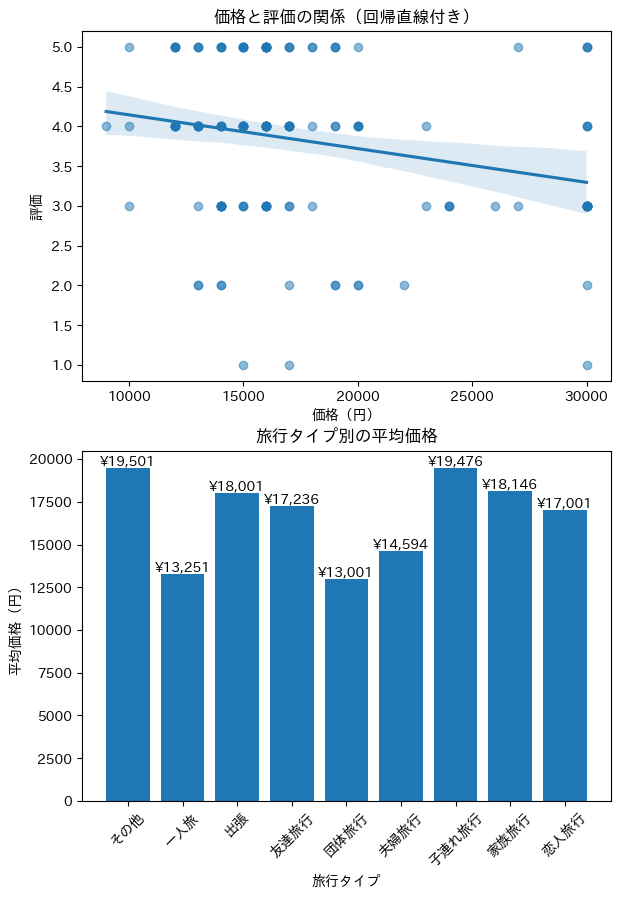

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import numpy as np

# データベースから読み込み
conn = sqlite3.connect('jalan_reviews.db')
query = "SELECT * FROM reviews"
df = pd.read_sql_query(query, conn)
conn.close()

# 価格の数値化
def extract_price(price_str):
    import re
    numbers = re.findall(r'(\d+(?:,\d+)?)', str(price_str))
    if numbers:
        return float(numbers[0].replace(',', ''))
    return None

df['price_value'] = df['price_range'].apply(extract_price)
df['rating_num'] = df['rating'].astype(float)


# 仮説１：価格と評価の関係
# グラフを作成
fig = plt.figure(figsize=(15, 10))

# 散布図と回帰直線
plt.subplot(2, 2, 1)
sns.regplot(data=df, x='price_value', y='rating_num', scatter_kws={'alpha':0.5})
plt.title('価格と評価の関係（回帰直線付き）')
plt.xlabel('価格（円）')
plt.ylabel('評価')

# 相関係数の計算と表示
correlation = df['price_value'].corr(df['rating_num'])
print(f"\n価格と評価の相関係数: {correlation:.3f}")

# 仮説２：旅行タイプ別の平均価格

# 棒グラフ：旅行タイプ別の平均価格
plt.subplot(2, 2, 3)
type_price_mean = df.groupby('travel_type')['price_value'].mean()

bars = plt.bar(type_price_mean.index, type_price_mean.values)
plt.title('旅行タイプ別の平均価格')
plt.xlabel('旅行タイプ')
plt.ylabel('平均価格（円）')
plt.xticks(rotation=45)

# 各棒の上に平均値を表示
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'¥{int(height):,}',
             ha='center', va='bottom')